In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots a bit prettier
sns.set(style="whitegrid")

# Load the validated observations
df = pd.read_csv("data/interim/observations.csv")

df.head()

,patient_id,timestamp,code,value,unit
0,10014729,2125-03-19 13:22:00,BP_SYS,93.0,mmHg
1,10014729,2125-03-19 18:28:00,BP_SYS,115.0,mmHg
2,10014729,2125-03-19 13:07:00,BP_SYS,132.0,mmHg
3,10014729,2125-03-19 16:23:00,BP_SYS,114.0,mmHg
4,10014729,2125-03-19 14:00:00,BP_SYS,131.0,mmHg


In [18]:
# Overview of columns, data types, and non-null counts
df.info()

# Simple summary stats for numeric columns
df.describe()

# Missing values per column
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996 entries, 0 to 1995
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   patient_id  1996 non-null   int64  
 1   timestamp   1996 non-null   object 
 2   code        1996 non-null   object 
 3   value       1996 non-null   float64
 4   unit        1996 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 78.1+ KB


patient_id    0
timestamp     0
code          0
value         0
unit          0
dtype: int64

In [19]:
from IPython.display import display
import matplotlib.pyplot as plt

missing_pct = (df.isnull().mean() * 100).round(2)

if (missing_pct == 0).all():
    print("✅ No missing values in any column.")
    display(missing_pct.rename("% missing").to_frame())
else:
    ax = missing_pct[missing_pct > 0].sort_values(ascending=False).plot(kind="bar")
    ax.set_ylabel("% Missing"); ax.set_title("Missingness by Column"); plt.tight_layout(); plt.show()



✅ No missing values in any column.


,% missing
patient_id,0.0
timestamp,0.0
code,0.0
value,0.0
unit,0.0


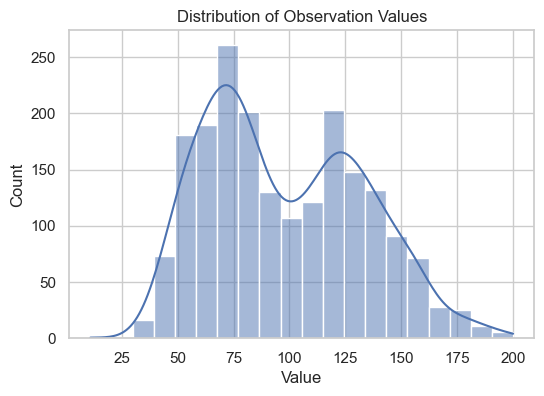

In [20]:
plt.figure(figsize=(6,4))
sns.histplot(df["value"], kde=True, bins=20)
plt.xlabel("Value")
plt.title("Distribution of Observation Values")
plt.show()


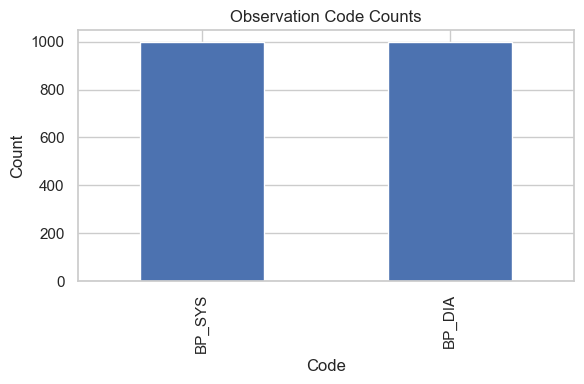

In [21]:
plt.figure(figsize=(6,4))
df["code"].value_counts().plot(kind="bar")
plt.title("Observation Code Counts")
plt.ylabel("Count")
plt.xlabel("Code")
plt.tight_layout()
plt.show()


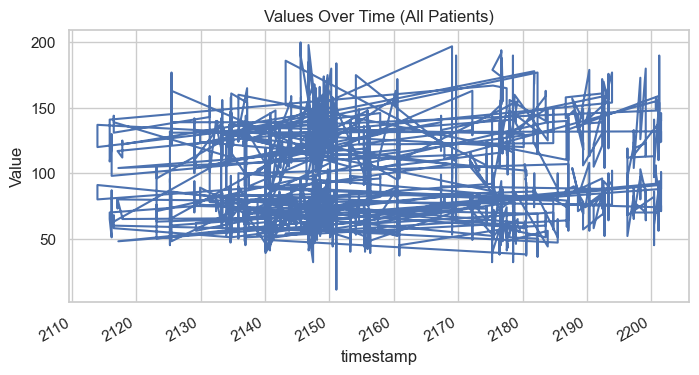

In [22]:
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
df = df.dropna(subset=["timestamp"])

plt.figure(figsize=(8,4))
df.set_index("timestamp")["value"].plot()
plt.title("Values Over Time (All Patients)")
plt.ylabel("Value")
plt.show()


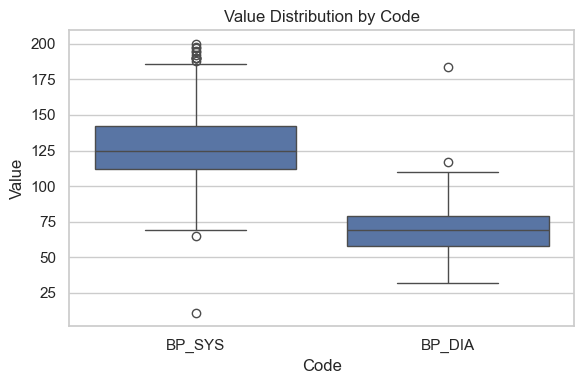

In [23]:
import seaborn as sns, matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="code", y="value")
plt.title("Value Distribution by Code")
plt.xlabel("Code"); plt.ylabel("Value"); plt.tight_layout(); plt.show()


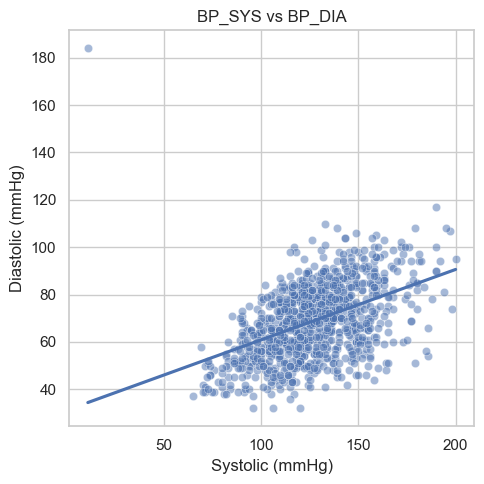

In [24]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

bp = df.pivot_table(index=["patient_id","timestamp"], columns="code", values="value").reset_index()
bp = bp.dropna(subset=["BP_SYS","BP_DIA"])
plt.figure(figsize=(5,5))
sns.scatterplot(data=bp, x="BP_SYS", y="BP_DIA", alpha=0.5)
sns.regplot(data=bp, x="BP_SYS", y="BP_DIA", scatter=False, ci=None)
plt.title("BP_SYS vs BP_DIA"); plt.xlabel("Systolic (mmHg)"); plt.ylabel("Diastolic (mmHg)")
plt.tight_layout(); plt.show()


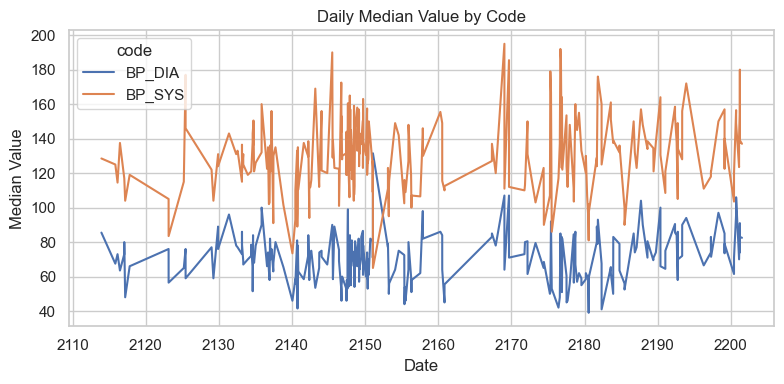

In [25]:
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
daily = (df
         .groupby(["code", pd.Grouper(key="timestamp", freq="D")])["value"]
         .median()
         .reset_index())
import seaborn as sns, matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
sns.lineplot(data=daily, x="timestamp", y="value", hue="code")
plt.title("Daily Median Value by Code"); plt.xlabel("Date"); plt.ylabel("Median Value")
plt.tight_layout(); plt.show()


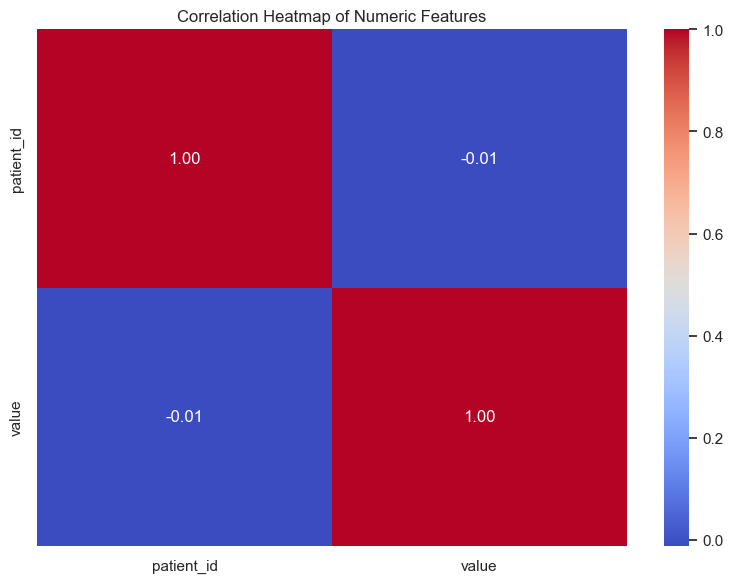

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your validated observations
df = pd.read_csv("data/interim/observations.csv")  # Or features.parquet if you prefer
# If using features:
# df = pd.read_parquet("data/processed/features.parquet")

# Compute correlations
corr = df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()



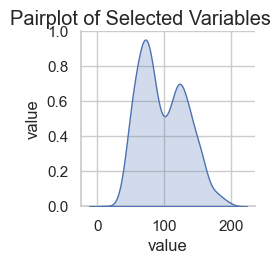

In [27]:
# Select a few columns for clarity (avoid too many for readability)
subset_cols = ["value"]  # Add more columns if you have them, like "BP_SYS_mean" later
sns.pairplot(df[subset_cols], diag_kind="kde")
plt.suptitle("Pairplot of Selected Variables", y=1.02)
plt.show()
